# Predicting Loan Defaults

In [176]:
import numpy as np
import pandas as pd

In [177]:
data=pd.read_csv("C:\Users\hp\Desktop\loans.csv")

In [178]:
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [180]:
data.columns

Index([u'credit.policy', u'purpose', u'int.rate', u'installment',
       u'log.annual.inc', u'dti', u'fico', u'days.with.cr.line', u'revol.bal',
       u'revol.util', u'inq.last.6mths', u'delinq.2yrs', u'pub.rec',
       u'not.fully.paid'],
      dtype='object')

In [181]:
column=["credit.policy", "purpose", "int.rate", "installment",
       "log_annual_inc", "dti", "fico", "days_with_cr_line", "revol_bal",
       "revol_util", "inq_last_6mths", "delinq_2yrs", "pub_rec",
       "not_fully_paid"]

In [182]:
data.columns=column

In [183]:
data.not_fully_paid.value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [184]:
X_features = list(data.columns )
X_features.remove( 'not_fully_paid' )
X_features

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec']

In [185]:
data_complete = pd.get_dummies(data[X_features],drop_first=True) 

In [186]:
len(data_complete.columns )

18

In [187]:
data_complete.head().T

,0,1,2,3,4
credit.policy,1.000000,1.000000,1.000000,1.000000,1.000000
int.rate,0.118900,0.107100,0.135700,0.100800,0.142600
installment,829.100000,228.220000,366.860000,162.340000,102.920000
log_annual_inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.480000,14.290000,11.630000,8.100000,14.970000
fico,737.000000,707.000000,682.000000,712.000000,667.000000
days_with_cr_line,5639.958333,2760.000000,4710.000000,2699.958333,4066.000000
revol_bal,28854.000000,33623.000000,3511.000000,33667.000000,4740.000000
revol_util,52.100000,76.700000,25.600000,73.200000,39.500000
inq_last_6mths,0.000000,0.000000,1.000000,1.000000,0.000000


In [188]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log_annual_inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days_with_cr_line             9578 non-null float64
revol_bal                     9578 non-null int64
revol_util                    9578 non-null float64
inq_last_6mths                9578 non-null int64
delinq_2yrs                   9578 non-null int64
pub_rec                       9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9578 non-null uint8
purpose_small_business        9

## 1.	Split it into a training and testing set. How should the split be made? Why? Which function will you use to split the data?

### Ans:
### The Splitting is nothing but dividing the dataset into train and test part. Here the splitting should be done randomly without any biasness in the data. 
### So we make use of  train_test_split from sklearn.cross_validation. 
### The train dataset should always have larger portion compare to test dataset. 

In [189]:
y=data.not_fully_paid

In [190]:
x=data_complete

In [191]:
from sklearn.cross_validation import train_test_split

In [192]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [193]:
y_test[0:5]

8917    0
2676    0
1446    0
1516    0
5038    0
Name: not_fully_paid, dtype: int64

## 2.	Now, use logistic regression trained on the training set to predict the dependent variable not.fully.paid using all the independent variables.

In [194]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [195]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [196]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.414749
         Iterations 6


In [197]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not_fully_paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6685
Method:                           MLE   Df Model:                           18
Date:                Thu, 23 Aug 2018   Pseudo R-squ.:                 0.06831
Time:                        15:22:48   Log-Likelihood:                -2780.5
converged:                       True   LL-Null:                       -2984.3
                                        LLR p-value:                 2.213e-75
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.1964      1.543      4.016      0.000       3.173       9.220
credit.policy                 -0.3726      0.099     -3.768      0.000      -0.566      -0.179
int.rate                       3.8858      2.077      1.871      0.061      -0.185       7.957
installment                    0.0012      0.000      5.890      0.000       0.001       0.002
log_annual_inc                -0.3803      0.070     -5.398      0.000      -0.518      -0.242
dti                           -0.0001      0.005     -0.022      0.982      -0.011       0.010
fico                          -0.0064      0.002     -3.749      0.000      -0.010      -0.003
days_with_cr_line           3.063e-06   1.59e-05      0.193      0.847   -2.81e-05    3.42e-05
revol_bal                   1.898e-06   1.06e-06      1.792      0.073   -1.78e-07    3.97e-06
revol_util                     0.0036      0.002      2.356      0.018       0.001       0.007
inq_last_6mths                 0.0869      0.016      5.372      0.000       0.055       0.119
delinq_2yrs                   -0.0671      0.063     -1.065      0.287      -0.191       0.056
pub_rec                        0.2159      0.120      1.792      0.073      -0.020       0.452
purpose_credit_card           -0.5551      0.129     -4.312      0.000      -0.807      -0.303
purpose_debt_consolidation    -0.3947      0.091     -4.316      0.000      -0.574      -0.215
purpose_educational            0.2528      0.172      1.473      0.141      -0.084       0.589
purpose_home_improvement      -0.0298      0.152     -0.196      0.845      -0.328       0.269
purpose_major_purchase        -0.3905      0.201     -1.946      0.052      -0.784       0.003
purpose_small_business         0.4770      0.140      3.410      0.001       0.203       0.751
==============================================================================================
"""

## 3.	Which independent variables are significant in our model? 

In [198]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [199]:
significant_vars = get_significant_vars( lg )

In [200]:
significant_vars

['const',
 'credit.policy',
 'installment',
 'log_annual_inc',
 'fico',
 'revol_util',
 'inq_last_6mths',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_small_business']

In [201]:
from sklearn import metrics

In [202]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [203]:
y_pred_df = get_predictions( y_test, lg )

In [204]:
y_pred_df[0:10]

,actual,predicted_prob
8917,0,0.238090
2676,0,0.089357
1446,0,0.148484
1516,0,0.080655
5038,0,0.075254
5786,0,0.065811
8543,1,0.262420
741,0,0.093176
1592,0,0.096483
309,1,0.166483


In [205]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [138]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
2320,0,0.061466,0
8734,1,0.200262,0
8103,0,0.150577,0
358,0,0.187393,0
7670,0,0.173713,0
2511,0,0.183737,0
6250,0,0.108872,0
4591,1,0.068144,0
543,0,0.136580,0
9574,1,0.183486,0


In [206]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [207]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

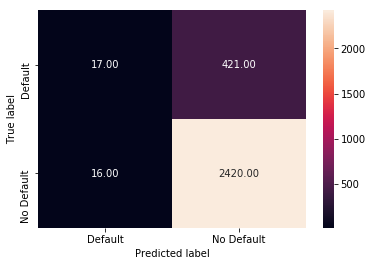

In [208]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [209]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

('Total Accuracy : ', 0.85)


In [210]:
print( 'Precision : ',np.round(metrics.precision_score( y_test, y_pred_df.predicted),2))

('Precision : ', 0.52)


In [211]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

('Recall : ', 0.04)


In [212]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [217]:
cm1

array([[  17,  421],
       [  16, 2420]], dtype=int64)

In [213]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [214]:
print('Sensitivity : ', round( sensitivity, 2) )

('Sensitivity : ', 0.0)


In [218]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [219]:
print('Specificity : ', round( specificity, 2 ) )

('Specificity : ', 0.0)


In [220]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.68

In [221]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

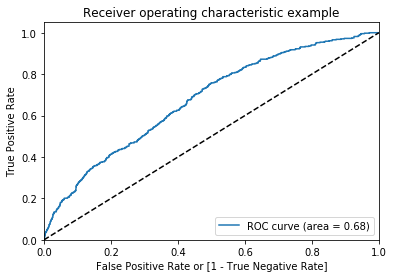

In [222]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

In [223]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )

In [224]:
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

In [225]:
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]

,fpr,thresholds,tpr,diff
1528,0.492611,0.132963,0.751142,0.258531
1542,0.497537,0.131596,0.755708,0.258171
1529,0.493021,0.132829,0.751142,0.258120
1549,0.500000,0.131285,0.757991,0.257991
1543,0.497947,0.131578,0.755708,0.257760
1530,0.493432,0.132685,0.751142,0.257710
1550,0.500411,0.131186,0.757991,0.257580
1544,0.498358,0.131535,0.755708,0.257350
1531,0.493842,0.132647,0.751142,0.257299
1551,0.500821,0.131156,0.757991,0.257170


In [303]:
y_pred_df['predicted_final'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.133 else 0)
#draw_cm( y_pred_df.actual, y_pred_df.predicted_final )

In [304]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_final ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_final, [1,0] )

from __future__ import division
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity,2))

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ))

('Total Accuracy : ', 0.54)
('Precision : ', 0.21)
('Recall : ', 0.75)
('Sensitivity : ', 0.75)
('Specificity : ', 0.51)


## 4.	What is the concept of Dummy variables in Logistic Regression? How would you interpret a Categorical IV in Logistic Regression? What is Logit and Why is it used?

### Ans:
### The concept of dummy varibale occurs in logistic regression when a Categorical Predictor Variable has More than Two Levels. 
### Here we are just recoding the original categorical variable into a set of binary variables that have values of one and zero
### The logit in logistic regression is a special case of a link function in a generalized linear model. 
### In other words, when Y is categorical, we use the logit of Y as the response in our regression equation instead of just Y
### It is the canonical link function for the Bernoulli/Binomial distribution.
### The logit function is the natural log of the odds that Y equals one of the categories.  For mathematical simplicity, we’re going to assume Y has only two categories and code them as 0 and 1

## 5. Predict the probability of the test set loans not being paid back in full. What is the accuracy of the logistic regression model? Input the accuracy as a number between 0 and 1.

### Ans
### Total Accuracy of the Model : 0.72

## 7. What is the Sensitivity, Specificity and Precision of a classification Model? Which one are used and when?

### Ans:
### Precision : 0.26
### Recall : 0.44
### Sensitivity : 0.0
### Specificity : 0.0
### Sensitivity/Recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
### Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.
### Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

## 8. What is a ROC Curve? Why is it used?

### Ans:
### Receiver Operating Characteristic curve (or ROC curve) is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.
### An ROC curve demonstrates several things:

### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
### The area under the curve is a measure of text accuracy